### Описание:

Летняя стажировка 2021 в команде продуктовой аналитики ВКонтакте предполагает создание модели, предсказывающей возраст/пол пользователя. И хотя в случае с подобными задачами велик соблазн приступить непосредственно к последнему шагу, наибольшее внимание всё же стоит уделить разведочному анализу данных (Exploratory Data Analysis — EDA). Чтобы мы могли оценить ваш уровень навыка анализа данных на Python, предлагаем провести EDA прикрепленного датасета — он включает в себя некоторые характеристики пользователей нашей платформы. Пожалуйста, проведите анализ и ответьте на следующие вопросы:

• Сколько различных групп пользователей можно выделить из данных?
• Каковы отличительные особенности этих групп? Как их можно интерпретировать?

Мы призываем вас подойти к задаче творчески и постараться найти как можно больше интересных взаимосвязей — порой интересные открытия совершаются случайно :)

Переменные:
```
• hashed_user_id — идентификатор пользователя;
• user_age — возраст;
• user_friends — количество друзей;
• user_communities_count — количество сообществ, в которых он состоит;
• user_fans_count — количество людей, подписанных на пользователя;
• user_subscriptions_count — количество подписок (людей или сообществ) пользователя;
• user_blacklist_count — количество профилей, помещенных в чёрный список;
• user_blacklisted_by_count — сколько раз пользователя помещали в чёрные списки;
• device_brand — производитель устройства пользователя;
• device_model — модель устройства;
• days_in_vk_1_week — количество дней присутствия в VK за последнюю неделю;
• days_in_vk_2_weeks — количество дней присутствия в VK за последние 2 недели;
• days_in_vk_4_weeks — количество дней присутствия в VK за последние 4 недели;
• messaging_total — общее количество отправленных сообщений;
• calls_accepted — количество принятых звонков;
• timespent_total — проведённое время в VK за день (суммарно);
• timespent_im — время, затраченное на личные сообщения;
• timespent_feed — время, затраченное на чтение ленты;
• timespent_photo — время, затраченное на просмотр фотографий;
• timespent_video — время, затраченное на просмотр видео;
• timespent_clips — время, затраченное на просмотр клипов;
• timespent_audio — время, затраченное на прослушивание музыки;
• timespent_story — время, затраченное на просмотр историй.
```

## 1) Понимание данных и создание новых фич

### Получение базового представления о данных

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 125893 entries, 0 to 125892
Data columns (total 23 columns):
 #   Column                    Non-Null Count   Dtype 
---  ------                    --------------   ----- 
 0   hashed_user_id            125893 non-null  object
 1   user_age                  125893 non-null  int64 
 2   user_sex                  125893 non-null  object
 3   user_friends              125893 non-null  int64 
 4   user_communities_count    125893 non-null  int64 
 5   user_fans_count           125893 non-null  int64 
 6   user_subscriptions_count  125893 non-null  int64 
 7   device_brand              107049 non-null  object
 8   device_model              106748 non-null  object
 9   days_in_vk_1_week         125893 non-null  int64 
 10  days_in_vk_2_weeks        125893 non-null  int64 
 11  days_in_vk_4_weeks        125893 non-null  int64 
 12  days_in_vk_8_weeks        125893 non-null  int64 
 13  messaging_total           125893 non-null  int64 
 14  call

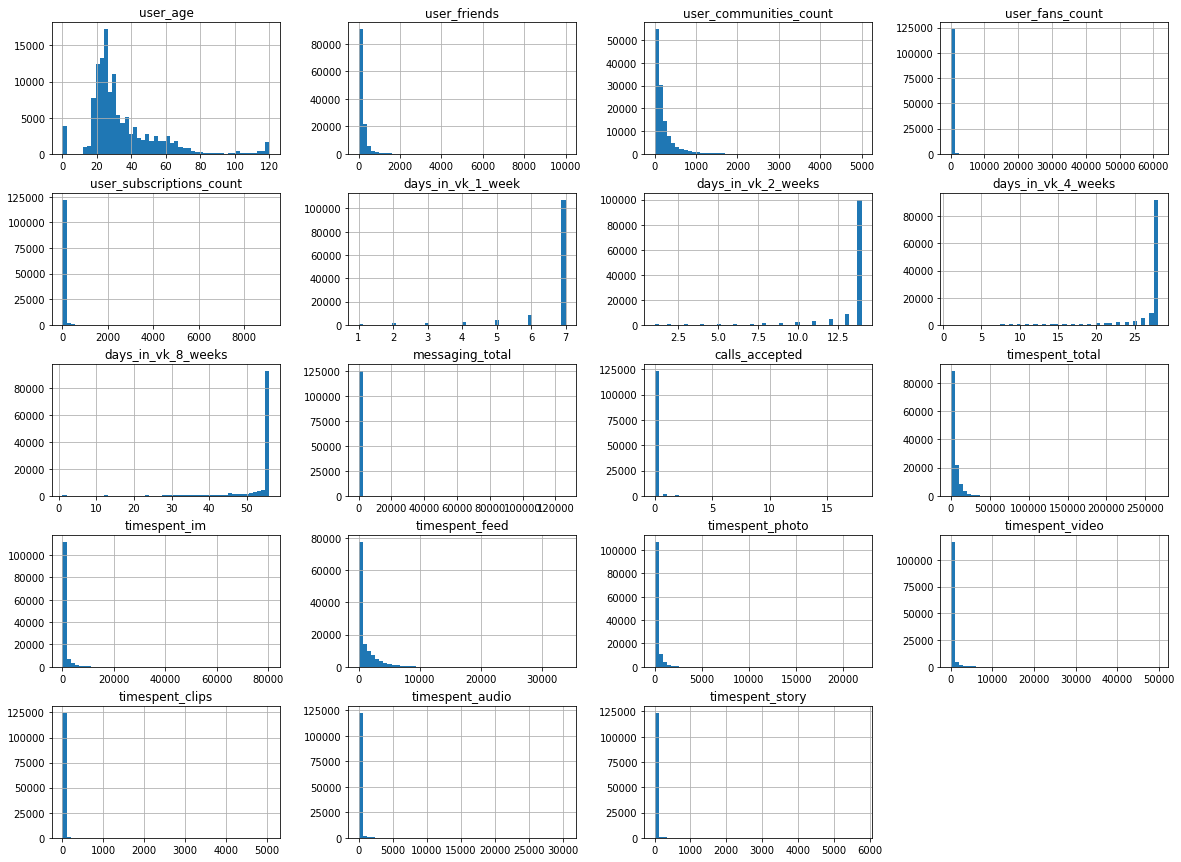

In [1]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

data = pd.read_csv("data/data.csv")

data.hist(bins = 50, figsize = (20, 15))
data.info()
plt.show()

### Вывод: Можем заметить что наши данные содержат выбросы, для осуществления анализа я решил прологарифмировать некоторые фичи

### Логарифмирование данных

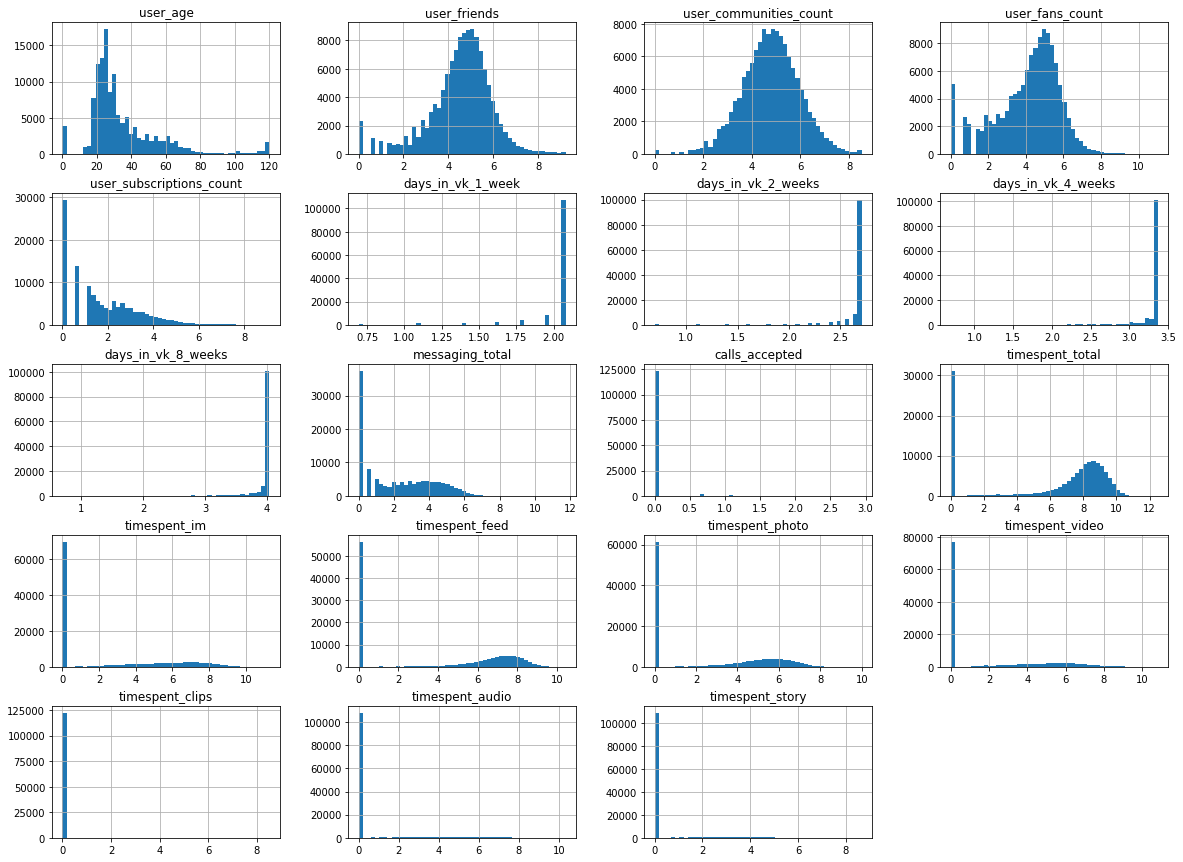

In [2]:
data1 = data.copy()
strange_features = ["hashed_user_id", "device_brand", "device_model", "user_age", "user_sex"]
old_features_names = [name for name in data if name not in strange_features]
data1 = data1.drop(old_features_names, axis = 1)

index = len(list(name for name in data1))

for name in old_features_names:
    data1.insert(index - 1, name, np.log1p(data[name]))
    index += 1
    
data1.hist(bins = 50, figsize = (20, 15))
plt.show()

### Вывод: Так выглядит уже куда лучше, теперь бинаризуем фичи

### Бинаризация фич

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


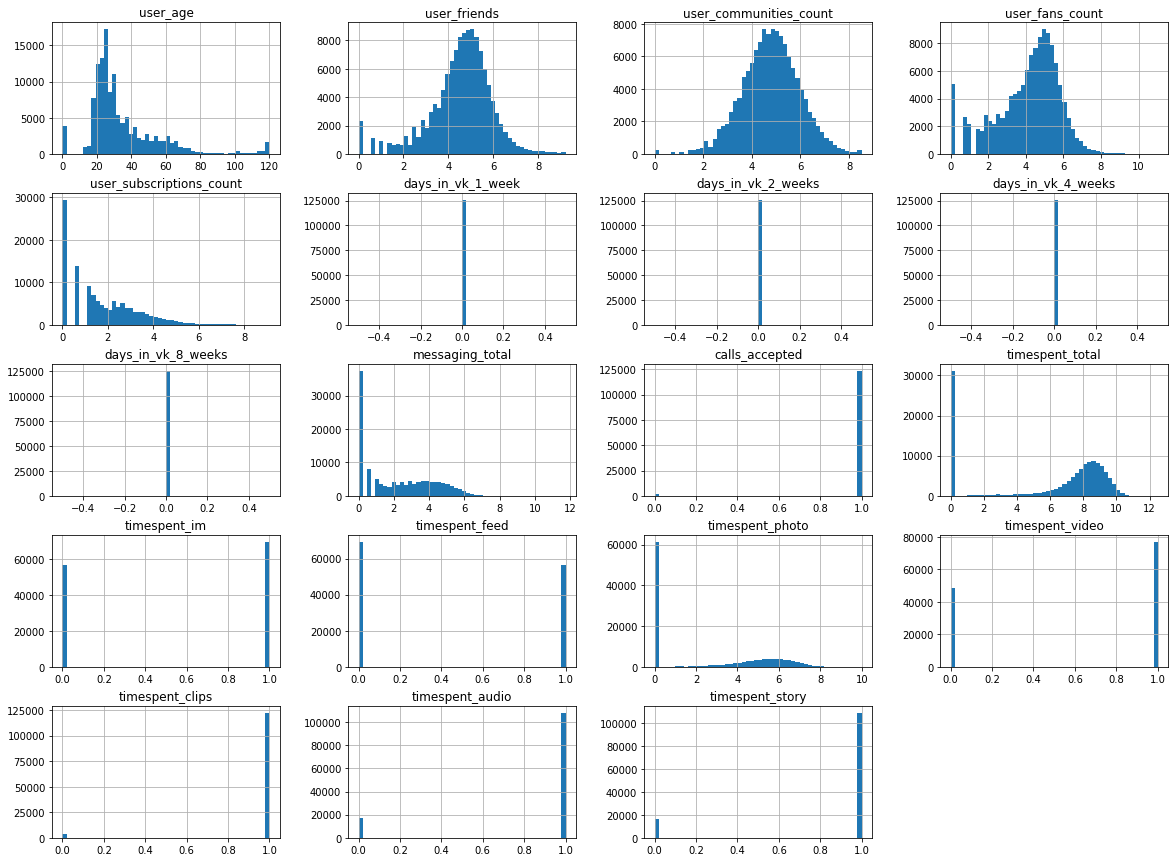

In [3]:
normal_metrics = ["user_communities_count", "user_subscriptions_count",
                 "user_friends", "messaging_total", "timespent_photo",
                  "user_fans_count", "timespent_total"]

for name in data1:
    if name not in normal_metrics and name not in strange_features:
        for i in range(len(data[name])):
            data1[name][i] = 0 if data[name][i] > 0 else 1
            
data1.hist(bins = 50, figsize = (20, 15))
plt.show()

In [4]:
print(np.mean(data1["days_in_vk_1_week"]))
print(np.mean(data1["timespent_story"]))
print(np.mean(data1["timespent_photo"]))

0.0
0.8672205762036015
2.67508874974798


### Вывод: Можем заметить что некотые наши фичи практически у всех пользователей равны нулю, что ж предлагаю их выкинуть

In [5]:
bad_features = []
for name in data1:
    if name not in strange_features:
        if (np.mean(data1[name]) < 0.15 or np.mean(data1[name]) > 0.85) and np.mean(data1[name]) <=1:
            bad_features.append(name)

data1 = data1.drop(bad_features, axis = 1)

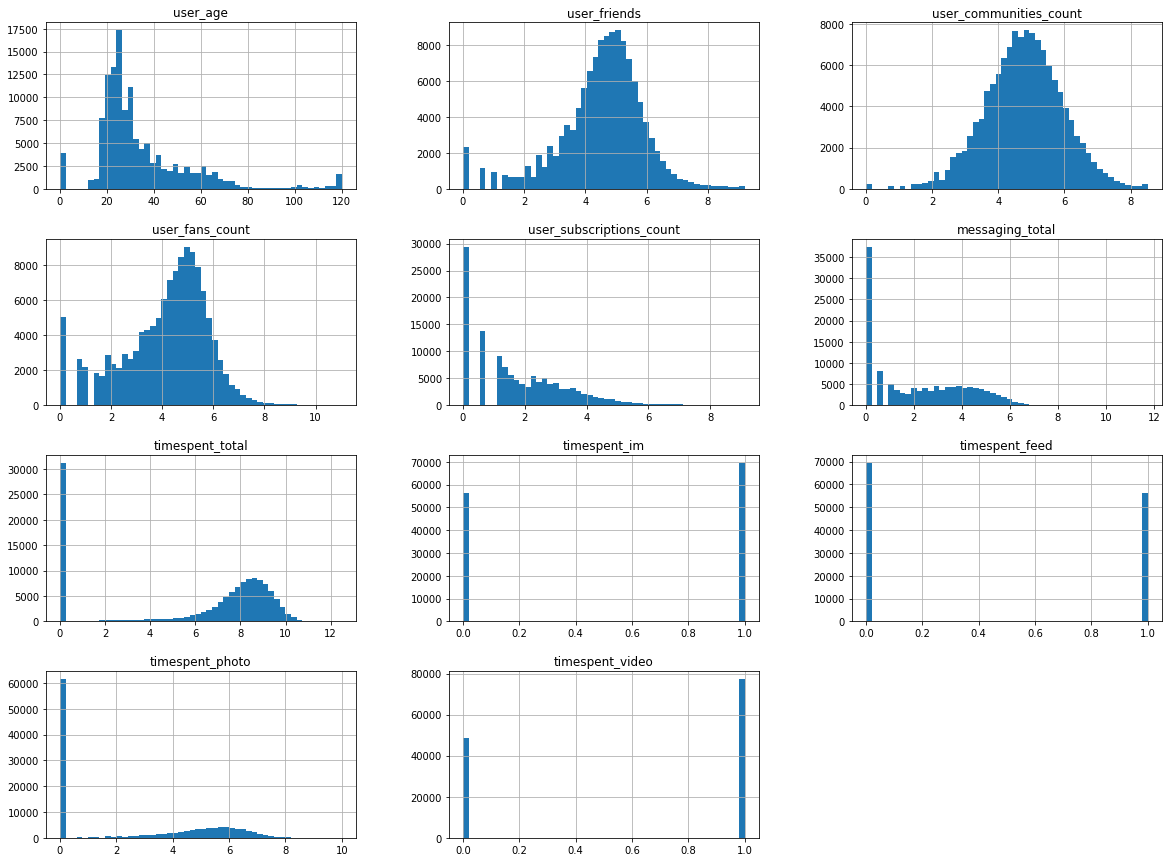

In [6]:

data1.hist(bins = 50, figsize = (20, 15))
plt.show()

### Вывод: Так выглядит уже куда лучше, мы бинаризовали и избавились от ненужных фич. Правда теперь мы потеряли добрую часть нашей информации

### Что ж, будем создавать новые фичи и проследим их корреляцию с возрастом юзера

In [7]:
index = len(list(name for name in data1))
old_features_names = [name for name in data1 if name not in strange_features]
futures_that_needs_be_dropped = []
for i in range(len(old_features_names)):
    for j in range(i + 1, len(old_features_names)):
        data1.insert(index - 1, old_features_names[i] +"_with_" + old_features_names[j], 
                    data1[old_features_names[i]] + data1[old_features_names[j]])
        index += 1

In [8]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 125893 entries, 0 to 125892
Data columns (total 23 columns):
 #   Column                    Non-Null Count   Dtype 
---  ------                    --------------   ----- 
 0   hashed_user_id            125893 non-null  object
 1   user_age                  125893 non-null  int64 
 2   user_sex                  125893 non-null  object
 3   user_friends              125893 non-null  int64 
 4   user_communities_count    125893 non-null  int64 
 5   user_fans_count           125893 non-null  int64 
 6   user_subscriptions_count  125893 non-null  int64 
 7   device_brand              107049 non-null  object
 8   device_model              106748 non-null  object
 9   days_in_vk_1_week         125893 non-null  int64 
 10  days_in_vk_2_weeks        125893 non-null  int64 
 11  days_in_vk_4_weeks        125893 non-null  int64 
 12  days_in_vk_8_weeks        125893 non-null  int64 
 13  messaging_total           125893 non-null  int64 
 14  call

### Вывод: Теперь корреляцию наших новых фич и возраста юзера практичеки невозможно отследить по гистограммам, уж слишком больщой датасет

### С помощью модели градиентного бустинга отследим корреляции между нашими новыми фичами и возрастом юзера

In [9]:
from xgboost import XGBRegressor
from xgboost import plot_importance


X_train = data1.drop(strange_features, axis = 1)
y_train = data["user_age"]
xgb_model = XGBRegressor(random_state = 42)
xgb_model.fit(X_train, y_train)
print("Feature Importances : ", xgb_model.feature_importances_)

[15:05:47] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
Feature Importances :  [0.00783538 0.00608724 0.08700896 0.04128022 0.01428449 0.00272025
 0.         0.         0.00231071 0.00321219 0.01108074 0.00509405
 0.00847751 0.00602926 0.00937405 0.00619814 0.01215766 0.00342703
 0.01224789 0.00761038 0.03209347 0.00439714 0.01019093 0.00403403
 0.00296688 0.00247481 0.002606   0.00492543 0.20960796 0.00314294
 0.00436988 0.0387388  0.00620697 0.14095145 0.00759025 0.06858485
 0.03318092 0.         0.00621844 0.01375235 0.00264471 0.00276861
 0.05902978 0.0090821  0.04209756 0.0072458  0.00453351 0.
 0.00311541 0.00723343 0.00241021 0.         0.00859763 0.
 0.00877151]


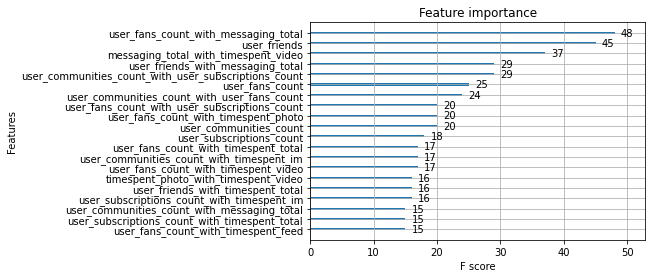

In [10]:
plot_importance(xgb_model, max_num_features= 20)
plt.show()

### Вывод: Мы получили прекрасный результат, мои некоторые признаки хорошо коррелирует в возрастом юзера

### Что, ж удалим все фичи, которые не особо сильно коррелируют в возрастом юзера

In [11]:
feature_importances = xgb_model.feature_importances_
f_imp_names = {}
index = 0
for name in X_train:
    f_imp_names.update({name : feature_importances[index]})
    index += 1
    
futures_that_needs_be_dropped = []
for name in X_train:
    if f_imp_names[name] < 0.010190933:
        futures_that_needs_be_dropped.append(name)


In [12]:
data1 = data1.drop(futures_that_needs_be_dropped, axis = 1)

### Посмотрим на наш старый - новый датасет

In [13]:
data1.head()

,hashed_user_id,user_age,user_sex,device_brand,user_fans_count,user_subscriptions_count,messaging_total,user_friends_with_user_communities_count,user_friends_with_timespent_feed,user_friends_with_timespent_video,user_communities_count_with_user_subscriptions_count,user_communities_count_with_timespent_total,user_fans_count_with_messaging_total,user_fans_count_with_timespent_feed,user_fans_count_with_timespent_video,user_subscriptions_count_with_timespent_total,user_subscriptions_count_with_timespent_im,user_subscriptions_count_with_timespent_video,messaging_total_with_timespent_feed,messaging_total_with_timespent_video,device_model
0,$1VAQ97BmCCZc,26,male,lge,5.891644,5.181784,0.693147,12.345461,6.177944,7.177944,11.349300,12.386117,6.584791,5.891644,6.891644,11.400384,6.181784,6.181784,0.693147,1.693147,LG-M250
1,$1v/FKogrWnz2,26,female,Apple,6.040255,0.000000,3.178054,9.044050,5.753590,5.753590,4.290459,4.290459,9.218309,7.040255,7.040255,0.000000,1.000000,1.000000,4.178054,4.178054,iPhone 7
2,$1eoMEtyVB3XM,26,female,Apple,7.894318,0.000000,3.526361,11.459145,6.697093,6.697093,5.762051,5.762051,11.420679,8.894318,8.894318,0.000000,1.000000,1.000000,4.526361,4.526361,iPhone 11 Pro Max
3,$12ZhvNRMpcZU,20,male,samsung,5.379897,0.000000,0.693147,9.872410,4.997212,5.997212,4.875197,13.409444,6.073045,5.379897,6.379897,8.534247,0.000000,1.000000,0.693147,1.693147,SM-G970F
4,$1mD0tDgB13tk,39,male,NaN,3.951244,3.526361,1.386294,10.677477,5.934474,5.934474,9.269364,12.914660,5.337538,4.951244,4.951244,10.698017,4.526361,4.526361,2.386294,2.386294,NaN


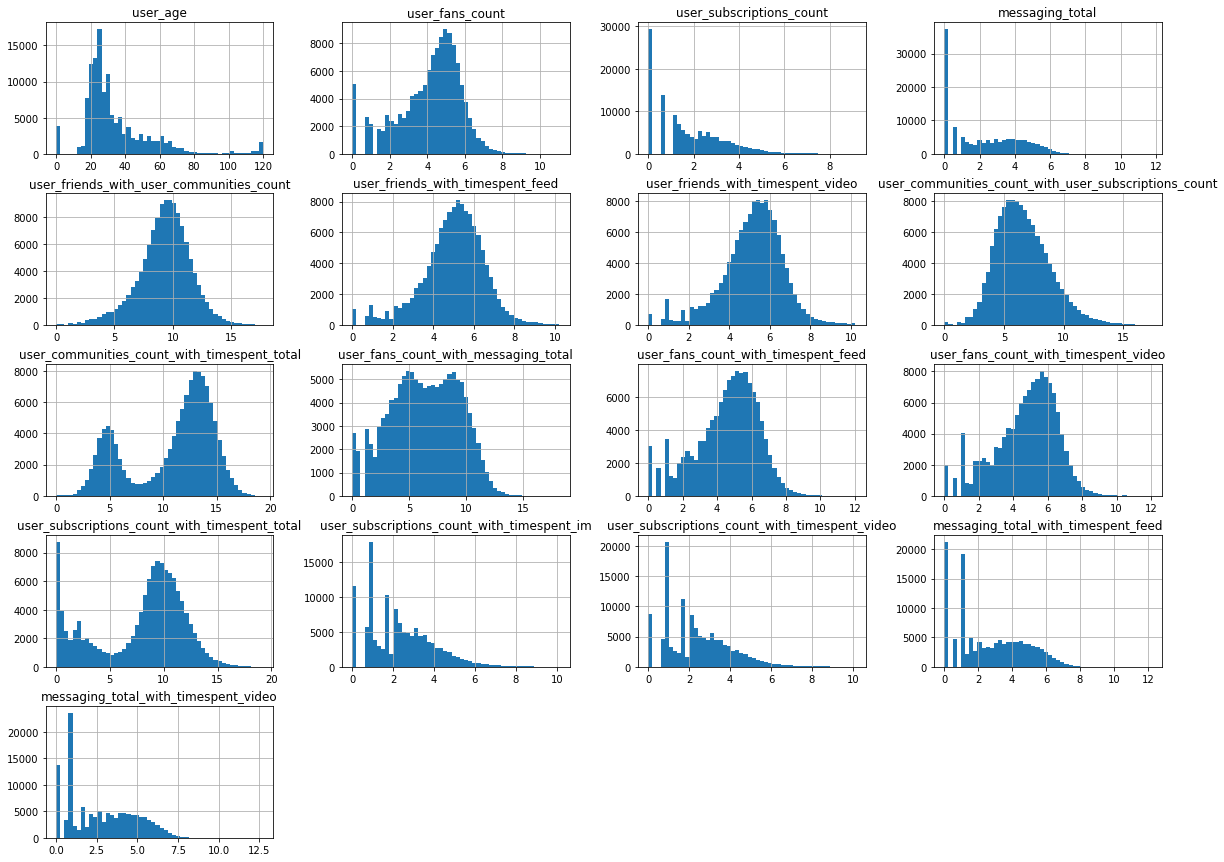

In [14]:
data1.hist(bins = 50, figsize = (20, 15))
plt.show()

### Вывод: Полученные графики лишь еще раз показывают нам отличную коррелияцию фич и возраста юзера

### Теперь когда мы получили фичи, мы можем проводить кластерный анализ

## 2)Кластерный анализ:

### Выделим фичи, которые имеют type object и будут мешать нам выделять кластеры пользователей

In [15]:
from sklearn.cluster import KMeans

new_strange_features = ["hashed_user_id", "device_brand", "device_model", "user_sex"]
model = KMeans(n_clusters = 5, random_state = 42)

### В качестве модели я решил использовать метод k_средних, по очевидным причинам я не могу считать Евклидово расстояние от всех объектов памяти. Это будет ${n^2}$ памяти, чего бы не очень хотелось, когда у нас 125 тысяч объектов

In [16]:
model.fit(data1.drop(new_strange_features, axis = 1))

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
       n_clusters=5, n_init=10, n_jobs=None, precompute_distances='auto',
       random_state=42, tol=0.0001, verbose=0)

### Для определения количества кластеров воспользуемся методом "Локтя"))

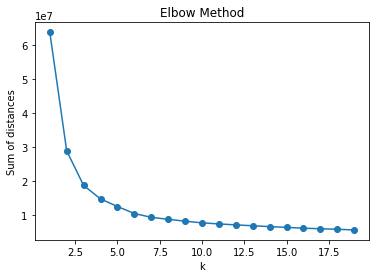

In [17]:
K = range(1, 20)
models = [KMeans(n_clusters = k , random_state = 42).fit(data1.drop(new_strange_features, 1)) for k in K]
dist = [model.inertia_ for model in models]

plt.plot(K, dist, marker = "o")
plt.xlabel("k")
plt.ylabel("Sum of distances")
plt.title("Elbow Method")
plt.show()

### Вывод: По графику явно видно, что у нас ровно 4 кластера

### Проверим наше предположение

In [22]:
num_clusters = 4
model = KMeans(n_clusters = num_clusters, random_state = 42)
model.fit(data1.drop(new_strange_features, 1))
data["cluster"] = model.labels_
data.groupby("cluster").mean()

,user_age,user_friends,user_communities_count,user_fans_count,user_subscriptions_count,days_in_vk_1_week,days_in_vk_2_weeks,days_in_vk_4_weeks,days_in_vk_8_weeks,messaging_total,calls_accepted,timespent_total,timespent_im,timespent_feed,timespent_photo,timespent_video,timespent_clips,timespent_audio,timespent_story
cluster,,,,,,,,,,,,,,,,,,,
0,35.507277,307.504603,284.038922,182.875407,67.265946,6.579029,13.029081,25.852528,51.237692,17.511136,0.013231,5069.020839,425.104333,1556.250565,239.738106,475.033078,6.367661,72.251861,7.894923
1,110.912512,252.121635,287.743270,196.069043,51.451396,6.690678,13.294616,26.447408,52.623380,68.646311,0.036640,4873.520688,734.103938,993.075025,214.176471,302.268445,3.610169,70.798106,9.496261
2,21.464744,199.090433,219.583884,241.970226,20.710243,6.825851,13.599251,27.142411,54.147330,85.551506,0.043952,4115.532652,848.443955,724.757744,193.749977,166.333176,1.889312,63.139243,7.892343
3,59.958678,142.117296,168.586179,51.735971,33.421744,6.330525,12.472895,24.643348,48.684068,9.496465,0.009127,4108.940073,234.347676,1607.182288,163.355950,396.101750,5.359109,14.575999,7.678502


### Вывод: получилось идеально, мы выделили ровно 4 различных кластера. Что самое интересное, у нас есть довольно большой кластер пользователей возрастом от 100 лет)

### Теперь приступим к анализу кластеров

In [23]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 125893 entries, 0 to 125892
Data columns (total 24 columns):
 #   Column                    Non-Null Count   Dtype 
---  ------                    --------------   ----- 
 0   hashed_user_id            125893 non-null  object
 1   user_age                  125893 non-null  int64 
 2   user_sex                  125893 non-null  object
 3   user_friends              125893 non-null  int64 
 4   user_communities_count    125893 non-null  int64 
 5   user_fans_count           125893 non-null  int64 
 6   user_subscriptions_count  125893 non-null  int64 
 7   device_brand              107049 non-null  object
 8   device_model              106748 non-null  object
 9   days_in_vk_1_week         125893 non-null  int64 
 10  days_in_vk_2_weeks        125893 non-null  int64 
 11  days_in_vk_4_weeks        125893 non-null  int64 
 12  days_in_vk_8_weeks        125893 non-null  int64 
 13  messaging_total           125893 non-null  int64 
 14  call

#### Так как я хочу все-таки извлечь информацию из полей типа object и не могу использовать метод one_hot_encoding, поскольку у меня слишком много различных марок и брендов телефонов. Чтоб решить эту проблему хочу предложить собственное уникальное решение, естественно оно где-то могло быть уже реализовано, также я не использовал встроенную библиотеку collections. Возможно можно получить более простой в плане понимания код, но эта реализация на 100% решает поставленную задачу и работает очень быстро из-за хэширования данных

### Создадим функцию для обновления словарей

In [24]:
def update_field(u_c, row, feature, field):
    if not pd.isnull(row[feature]):
        elem = row[feature].lower()
        if elem not in field[u_c]:
            field[u_c].update({elem : 1})
        else:
            field[u_c][elem] += 1

### Пройдемся по всему датасету и заполним наши словари

In [25]:
features = ["user_sex", "device_model", "device_brand"]
fields = [{i:{} for i in range(num_clusters)} for i in range(len(features))]

for index, row in data.iterrows():
    u_c = row["cluster"]
    for index, elem in enumerate(features):
        update_field(u_c, row, elem, fields[index])

cluster_users_sex, cluster_device_models, cluster_device_brands = fields

### Так как словарь - неупорядоченная структура данных, а мы хотим построить графики и выделить какую-то информацию кастанем все к спискам

In [26]:
def clear_data(field):
    favorite_smt = []
    for cluster in range(num_clusters):
        list_of_elem = [[name, field[cluster][name]]
                          for name in field[cluster]]
        list_of_elem = list(reversed(sorted(list_of_elem, 
                                key = lambda x: x[1])))
        list_of_elem = [list_of_elem[i] for i in range(5) \
        if list_of_elem[i][0] != "nan"]

        favorite_smt.append(list_of_elem)
  
    return favorite_smt

In [27]:
favorite_device_brands = clear_data(cluster_device_brands)
favorite_devices = clear_data(cluster_device_models)

### Проверим наши результаты и увидим что мы не потеряли юзеров, а следовательно код работает правильно

In [28]:
cluster_users_sex

{0: {'female': 8894, 'male': 27359, 'unknown': 25},
 1: {'female': 1087, 'male': 2924, 'unknown': 1},
 2: {'female': 23552, 'male': 42096, 'unknown': 14},
 3: {'female': 11815, 'male': 8089, 'unknown': 37}}

### Теперь можем строить гистограммы и делать выводы из полученной информации

In [29]:
def plot_histograms(list_of_data, feature):
    clusters = {0:"Boomers", 1: "Serious men", 2:"Zoomers", 3:"Millennial"}
    for clust in clusters:
        plt.rcdefaults()
        fig, ax = plt.subplots()
        plt.xlabel('users')
        plt.ylabel(feature)
        plt.title("Histogram for " + clusters[clust] + ":")

        names = [elem[0] for elem in list_of_data[clust]]
        values = [elem[1] for elem in list_of_data[clust]]
        y_pos = np.arange(len(names))
        ax.barh(y_pos, values, align='center')
        ax.set_yticks(y_pos)
        ax.set_yticklabels(names)

        plt.show()

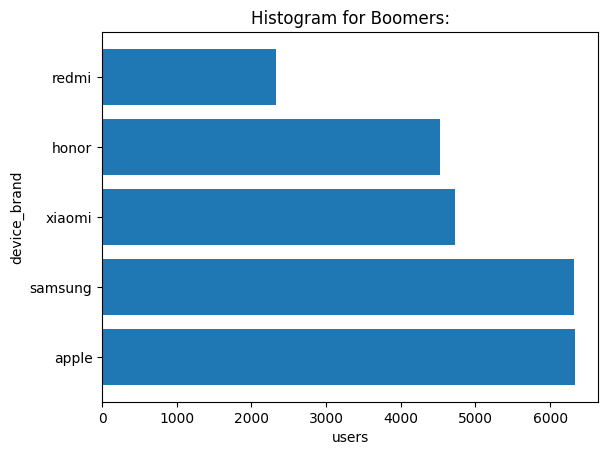

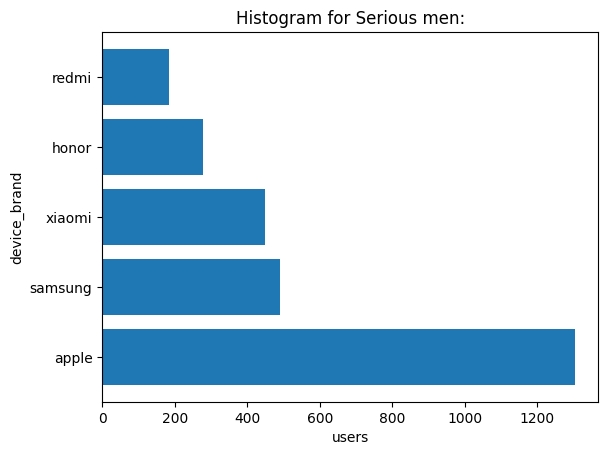

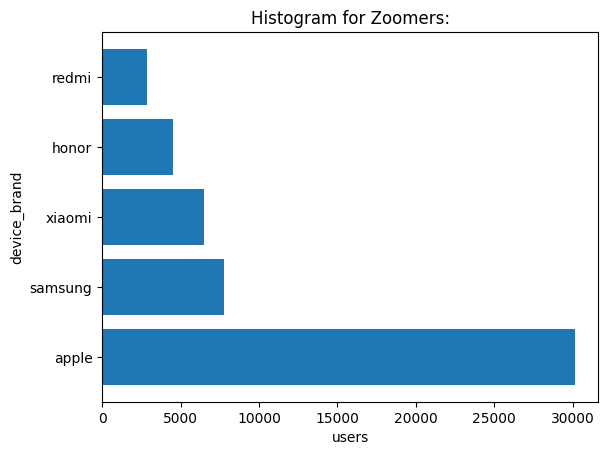

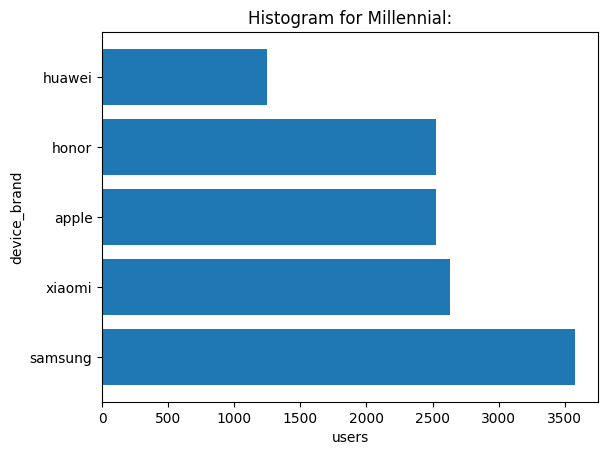

In [30]:
plot_histograms(favorite_device_brands, "device_brand")

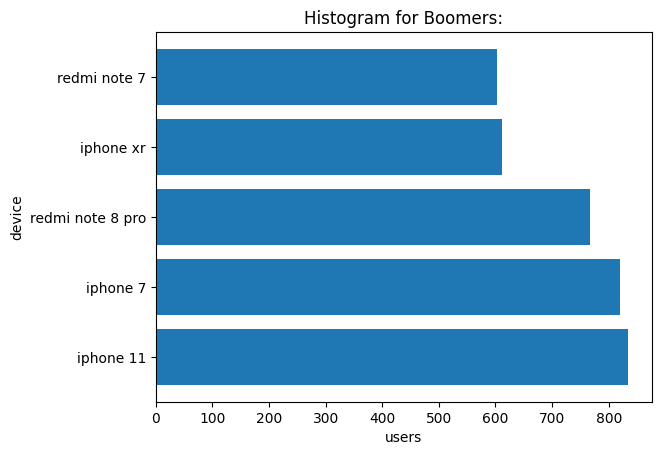

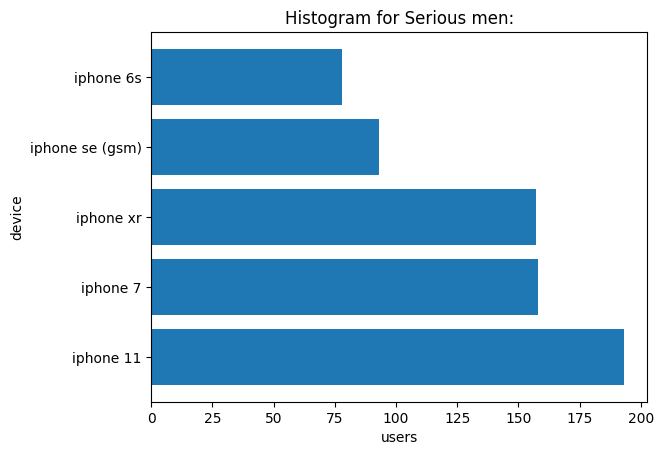

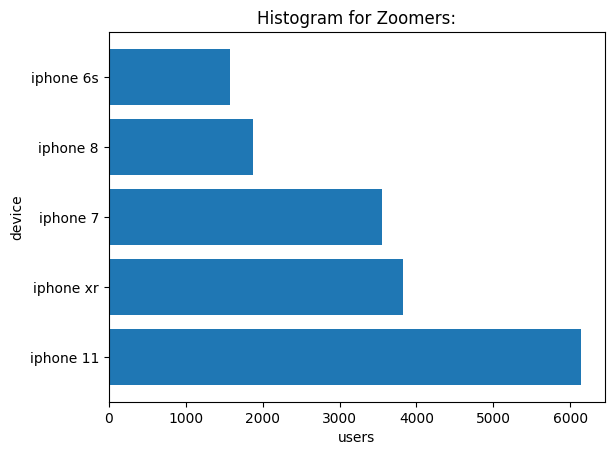

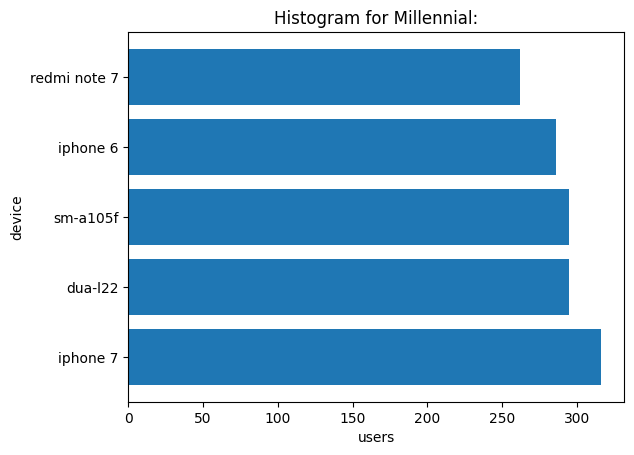

In [31]:
plot_histograms(favorite_devices, "device")

In [32]:
df = data.groupby("cluster").mean()
df

,user_age,user_friends,user_communities_count,user_fans_count,user_subscriptions_count,days_in_vk_1_week,days_in_vk_2_weeks,days_in_vk_4_weeks,days_in_vk_8_weeks,messaging_total,calls_accepted,timespent_total,timespent_im,timespent_feed,timespent_photo,timespent_video,timespent_clips,timespent_audio,timespent_story
cluster,,,,,,,,,,,,,,,,,,,
0,35.507277,307.504603,284.038922,182.875407,67.265946,6.579029,13.029081,25.852528,51.237692,17.511136,0.013231,5069.020839,425.104333,1556.250565,239.738106,475.033078,6.367661,72.251861,7.894923
1,110.912512,252.121635,287.743270,196.069043,51.451396,6.690678,13.294616,26.447408,52.623380,68.646311,0.036640,4873.520688,734.103938,993.075025,214.176471,302.268445,3.610169,70.798106,9.496261
2,21.464744,199.090433,219.583884,241.970226,20.710243,6.825851,13.599251,27.142411,54.147330,85.551506,0.043952,4115.532652,848.443955,724.757744,193.749977,166.333176,1.889312,63.139243,7.892343
3,59.958678,142.117296,168.586179,51.735971,33.421744,6.330525,12.472895,24.643348,48.684068,9.496465,0.009127,4108.940073,234.347676,1607.182288,163.355950,396.101750,5.359109,14.575999,7.678502


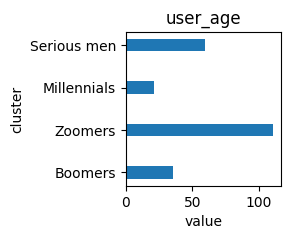

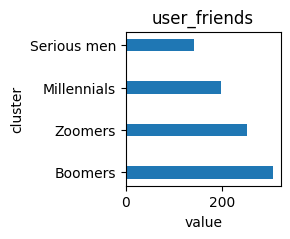

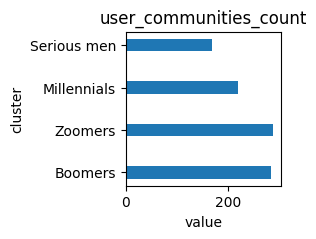

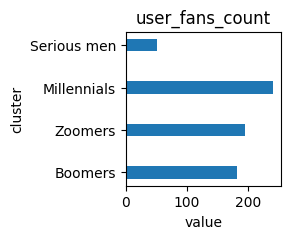

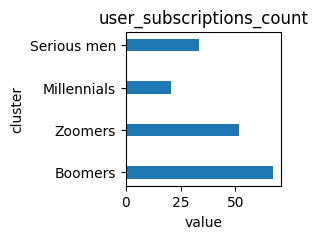

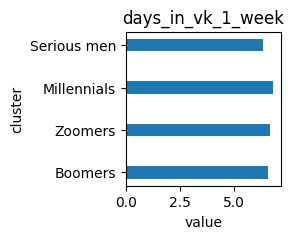

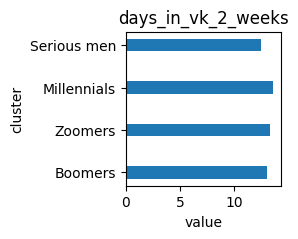

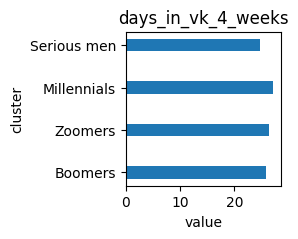

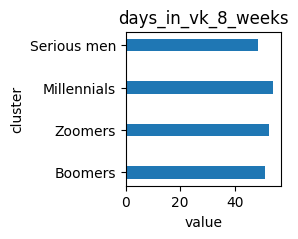

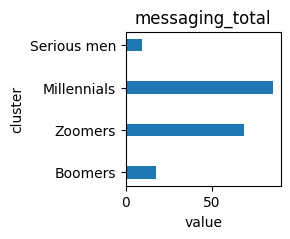

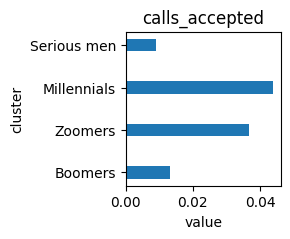

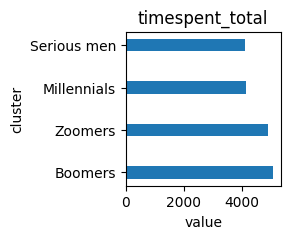

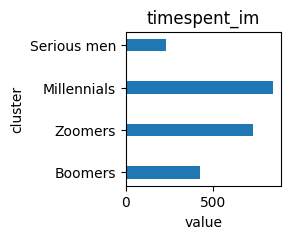

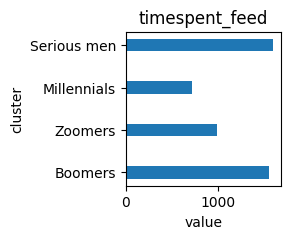

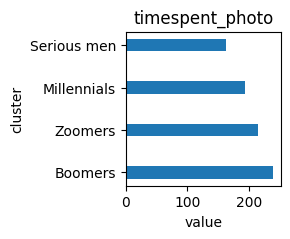

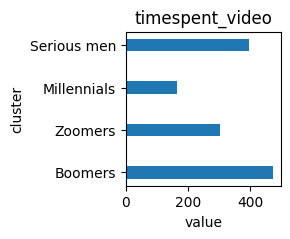

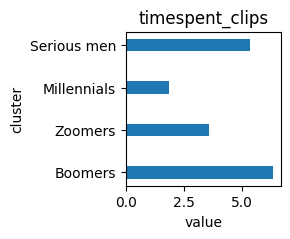

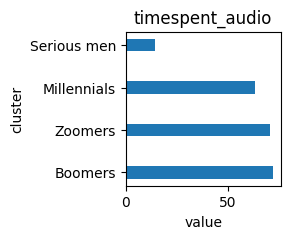

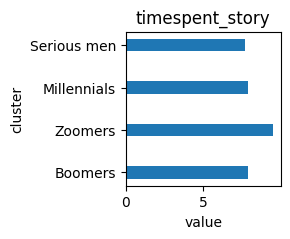

In [33]:
df = data.groupby("cluster").mean()
clusters = {0: "Boomers", 1: "Zoomers", 2: "Millennials", 3: "Serious men"}
for feature in df:
    plt.rcdefaults()
    fig, ax = plt.subplots()
    plt.xlabel('value')
    plt.ylabel("cluster")
    plt.title(feature)
    plt.gcf().set_size_inches(2,2)
    y_pos = np.arange(len(clusters))
    ax.barh(y_pos, df[feature], align='center', height = 0.3)
    ax.set_yticks(y_pos)
    ax.set_yticklabels((list(clusters[name] for name in clusters)))
    plt.show()
    

### Отлично, мы завершили кластерный анализ и теперь можем делать выводы, их вы можете прочитать по [ссылке](https://github.com/vaskers5/VK_test/blob/main/C_Report.ipynb):